**import all necessary packages**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

**CIFAR10 Dataset**

- the cifar10 dataset consists of 60000 images in 10 different calsses
- each class will have 6000 images
- 50000 images we use for the training purpose
- 10000 images we use for the testing purpose


In [5]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 132s 1us/step


In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
train_labels.shape

(50000, 1)

In [8]:
test_images.shape

(10000, 32, 32, 3)

In [9]:
test_labels.shape

(10000, 1)

In [ ]:
# let us take the class names

In [10]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
len(class_names)

10

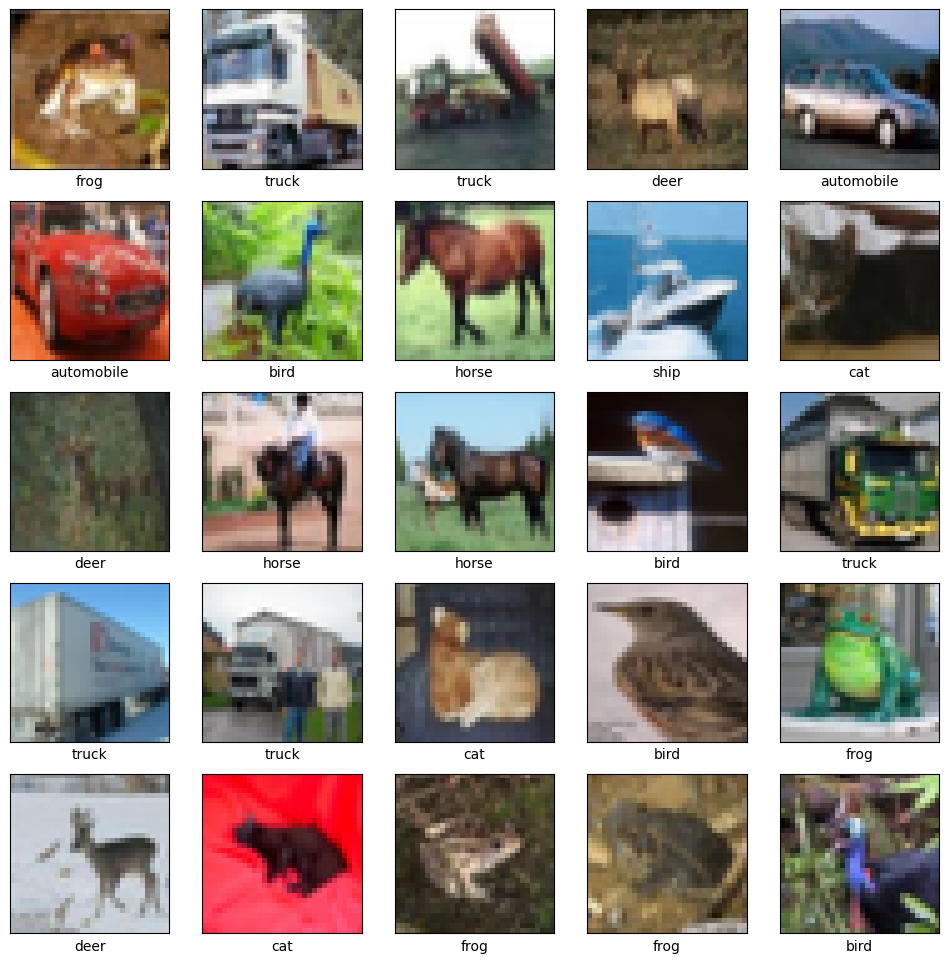

In [30]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

**creation of CNN network**
- convolution
- activation
- stride
- padding
- pooling

In [35]:
model=models.Sequential()
model.add(layers.Conv2D(32,   #number of filters
                        (3,3),  #filter size
                        activation="relu", # activation function
                        input_shape=(32,32,3)
                        
                       ))
model.add(layers.MaxPool2D((2,2))) # shape of the pool
##########################################################
model.add(layers.Conv2D(64,   #number of filters
                        (3,3),  #filter size
                        activation="relu", # activation function
                        input_shape=(32,32,3)
                        
                       ))
model.add(layers.MaxPool2D((2,2))) # shape of the pool
#########################################################################
model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernal size
                        activation='relu'))

In [36]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
#compile and train the model

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10


1563/1563 [==============================] - 29s 16ms/step - loss: 1.6897 - accuracy: 0.3945 - val_loss: 1.3928 - val_accuracy: 0.5008
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3056 - accuracy: 0.5378 - val_loss: 1.2487 - val_accuracy: 0.5652
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1622 - accuracy: 0.5912 - val_loss: 1.1268 - val_accuracy: 0.6056
Epoch 4/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0589 - accuracy: 0.6294 - val_loss: 1.1598 - val_accuracy: 0.6007
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9799 - accuracy: 0.6590 - val_loss: 1.0090 - val_accuracy: 0.6560
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9126 - accuracy: 0.6842 - val_loss: 0.9769 - val_accuracy: 0.6658
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8559 - accuracy: 0.7022 - val_loss: 1.085

313/313 - 2s - loss: 0.9748 - accuracy: 0.6799 - 2s/epoch - 7ms/step


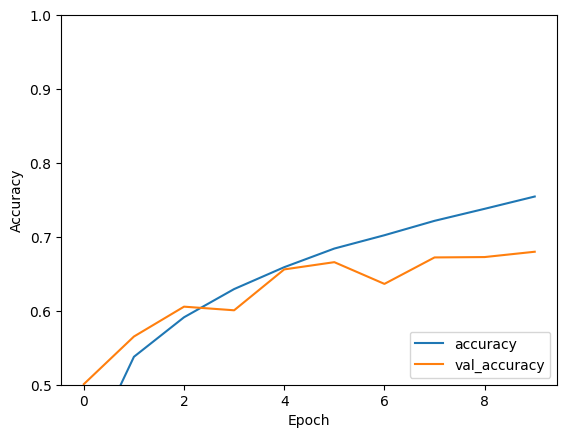

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels,verbose=2)